In [1]:
import json
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras import initializers

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(42)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

initializers_list = [
    initializers.RandomNormal,
    initializers.RandomUniform,
    initializers.TruncatedNormal,
    initializers.VarianceScaling,
    initializers.GlorotNormal,
    initializers.GlorotUniform,
    initializers.HeNormal,
    initializers.HeUniform,
    initializers.LecunNormal,
    initializers.LecunUniform,
    initializers.Orthogonal,
]

for initializer in initializers_list:
    print(f"Running {initializer}")

    for iteration in range(2):
        # In order to get same results across multiple runs from an initializer,
        # you can specify a seed value.
        result = float(initializer(seed=42)(shape=(1, 1)))
        print(f"\tIteration --> {iteration} // Result --> {result}")
    print("\n")


Running <class 'keras.src.initializers.initializers.RandomNormal'>
	Iteration --> 0 // Result --> 0.000790853810030967
	Iteration --> 1 // Result --> 0.000790853810030967


Running <class 'keras.src.initializers.initializers.RandomUniform'>
	Iteration --> 0 // Result --> -0.02175668440759182
	Iteration --> 1 // Result --> -0.02175668440759182


Running <class 'keras.src.initializers.initializers.TruncatedNormal'>
	Iteration --> 0 // Result --> 0.000790853810030967
	Iteration --> 1 // Result --> 0.000790853810030967


Running <class 'keras.src.initializers.initializers.VarianceScaling'>
	Iteration --> 0 // Result --> 0.017981600016355515
	Iteration --> 1 // Result --> 0.017981600016355515


Running <class 'keras.src.initializers.initializers.GlorotNormal'>
	Iteration --> 0 // Result --> 0.017981600016355515
	Iteration --> 1 // Result --> 0.017981600016355515


Running <class 'keras.src.initializers.initializers.GlorotUniform'>
	Iteration --> 0 // Result --> -0.7536736726760864
	Iterati

In [2]:
from services.load_dataset import load_data

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

In [23]:
from services.ml_modelling import run_xgboost_random_tuning

xgb_param_grid = {
    'n_estimators': [500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [1, 5, 10, 50, 100],  # used only when use_smote=False 
    'use_smote': [True, False],
    'eval_metric': ['logloss'],
    'use_label_encoder': [False]
}

results, best_model, best_params = run_xgboost_random_tuning(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    X_test=X_test,
    y_test=y_test,
    param_grid=xgb_param_grid,
    n_iter=100
)

c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Random hyperparameter search for XGBoost (100 iterations)...

Iteration 1/100
Params: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 0.8, 'gamma': 0, 'use_smote': True, 'eval_metric': 'logloss'} | F1: 0.7045 | Precision: 0.6458 | Recall: 0.7750 | AUC: 0.9552 | Time: 4.91s
Iteration 2/100
Params: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'use_smote': True, 'eval_metric': 'logloss'} | F1: 0.7381 | Precision: 0.7045 | Recall: 0.7750 | AUC: 0.9698 | Time: 6.66s
Iteration 3/100
Params: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01, 'subsample': 1.0, 'colsample_bytree': 0.8, 'gamma': 1, 'use_smote': False, 'eval_metric': 'logloss', 'scale_pos_weight': 5} | F1: 0.6458 | Precision: 0.5536 | Recall: 0.7750 | AUC: 0.9753 | Time: 5.88s
Iteration 4/100
Params: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8

In [3]:
import json

with open('results/dp_xgboost/hyperparameter_tuning.json', 'r') as f:
    results = json.load(f)

In [4]:
from services.ml_modelling import prepare_flattened_data

X_train_base, y_train_base, scaler = prepare_flattened_data(X_train, y_train, apply_smote=False, fit_scaler=True)
X_train_smote, y_train_smote, _ = prepare_flattened_data(X_train, y_train, apply_smote=True, scaler=scaler)
X_val_proc, y_val_proc, _ = prepare_flattened_data(X_val, y_val, apply_smote=False, scaler=scaler)
X_test_proc, y_test_proc, _ = prepare_flattened_data(X_test, y_test, apply_smote=False, scaler=scaler)

c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
from xgboost import XGBClassifier

best_params = max(results, key=lambda x: x['f1'])['params']

train_X = X_train_smote if best_params['use_smote'] else X_train_base
train_y = y_train_smote if best_params['use_smote'] else y_train_base

best_model = XGBClassifier(early_stopping_rounds=15, **best_params)
best_model.fit(
    train_X, train_y,
    eval_set=[(X_val_proc, y_val_proc)],
    verbose=False
)

print(best_params)

c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:30:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'subsample': 1.0, 'colsample_bytree': 0.8, 'gamma': 1, 'use_smote': True, 'eval_metric': 'logloss'}


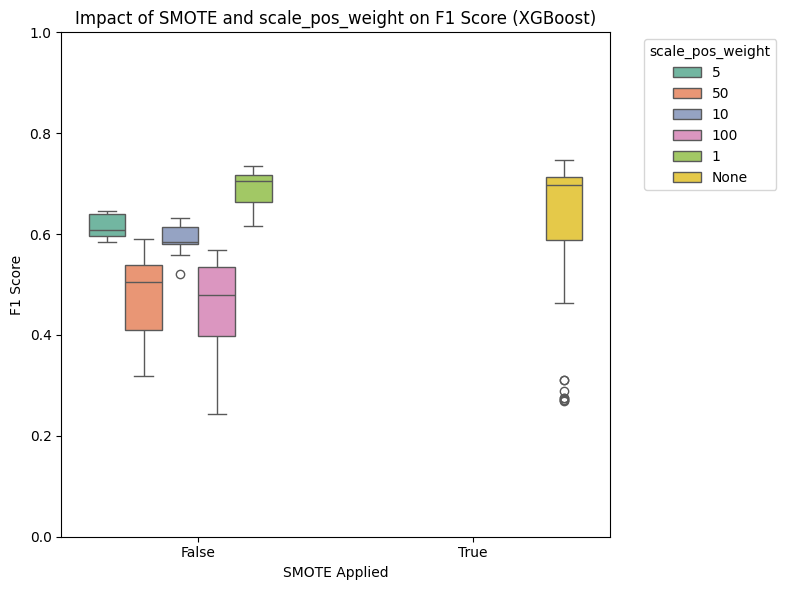

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the DataFrame from all_results
df = pd.DataFrame(results)

# Extract relevant hyperparams
df['use_smote'] = df['params'].apply(lambda p: p['use_smote'])

# Handle scale_pos_weight: only exists when SMOTE is False
def get_scale_weight(p):
    if p['use_smote']:
        return 'None'
    return str(p.get('scale_pos_weight', 'None'))

df['scale_pos_weight'] = df['params'].apply(get_scale_weight)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='use_smote', y='f1', hue='scale_pos_weight', data=df, palette='Set2')

# Optional: Overlay actual data points
#sns.stripplot(x='use_smote', y='f1', hue='scale_pos_weight', data=df,
#              dodge=True, color='black', alpha=0.4, jitter=0.15, linewidth=0)

plt.title("Impact of SMOTE and scale_pos_weight on F1 Score (XGBoost)")
plt.xlabel("SMOTE Applied")
plt.ylabel("F1 Score")
# Remove duplicate handles from stripplot (keep only one set of legend entries)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))  # remove duplicates
plt.legend(title="scale_pos_weight", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.ylim(0, 1.0)
plt.show()


In [53]:
from services.modeling import apply_smote_without_seq

X_train_datasets_original = []
y_train_datasets_original = []
X_train_datasets_smote = []
y_train_datasets_smote = []

# Vary the X_train and y_train size to see how it affects the privacy
# Take last 90%, 80%, ... 10% of the dataset
for i in range(1, 11):
    X_train_ds = X_train[:int(len(X_train) * i / 10)]
    y_train_ds = y_train[:int(len(y_train) * i / 10)]
    X_train_smote, y_train_smote = apply_smote_without_seq(X_train_ds, y_train_ds, sampling_strategy=0.25)

    X_train_datasets_original.append(X_train_ds)
    y_train_datasets_original.append(y_train_ds)
    X_train_datasets_smote.append(X_train_smote)
    y_train_datasets_smote.append(y_train_smote)

c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\e

X_train_seq shape: (19642, 29)
y_train_seq shape: (19642,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


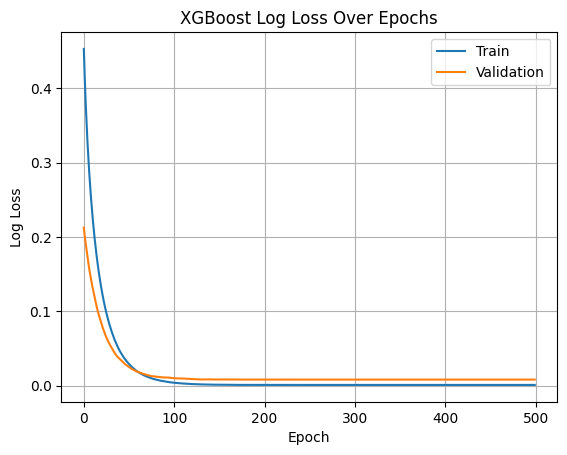

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.28      0.63      0.38        99

    accuracy                           1.00     76156
   macro avg       0.64      0.81      0.69     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


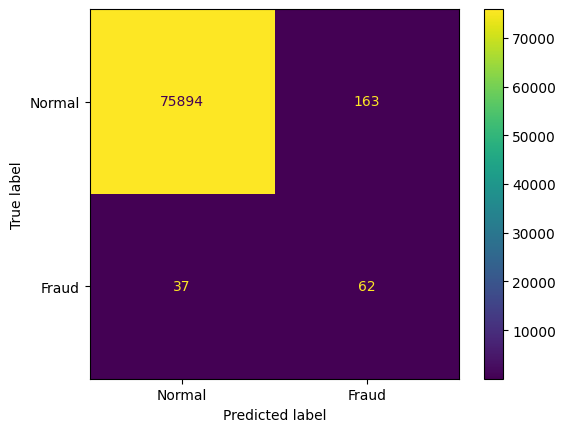

X_train_seq shape: (39338, 29)
y_train_seq shape: (39338,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:02:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


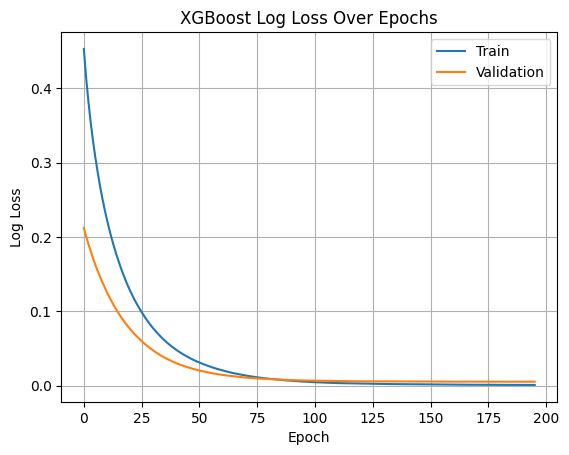

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.45      0.71      0.55        99

    accuracy                           1.00     76156
   macro avg       0.73      0.85      0.78     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


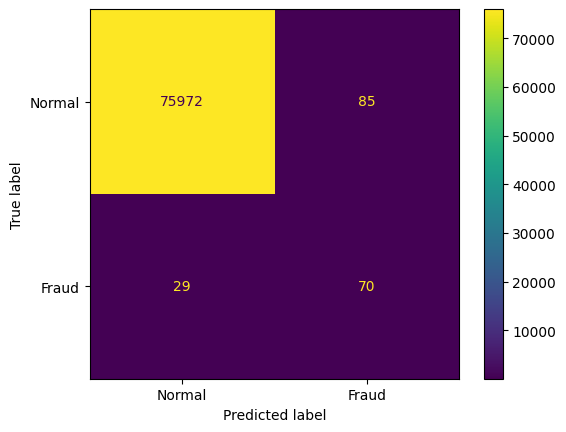

X_train_seq shape: (59017, 29)
y_train_seq shape: (59017,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:02:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


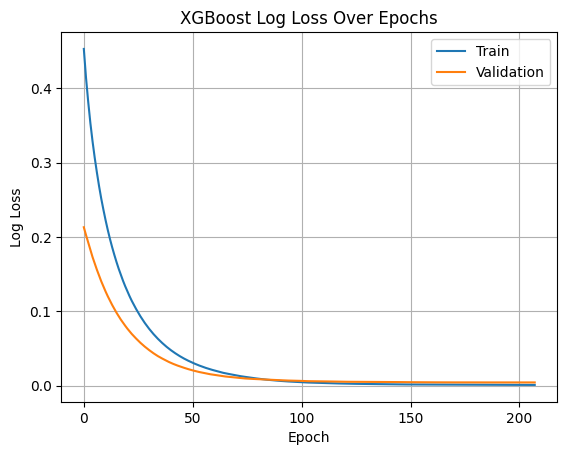

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.56      0.75      0.64        99

    accuracy                           1.00     76156
   macro avg       0.78      0.87      0.82     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


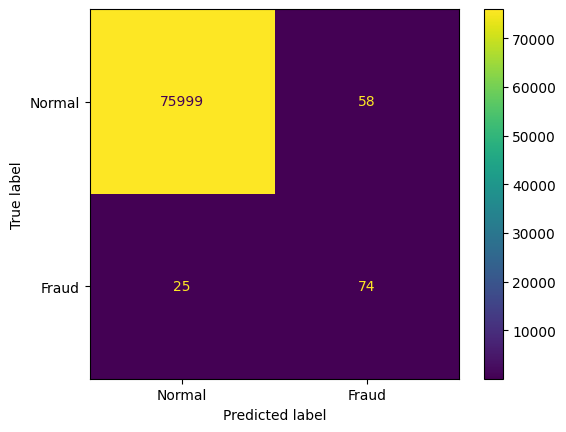

X_train_seq shape: (78728, 29)
y_train_seq shape: (78728,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:02:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


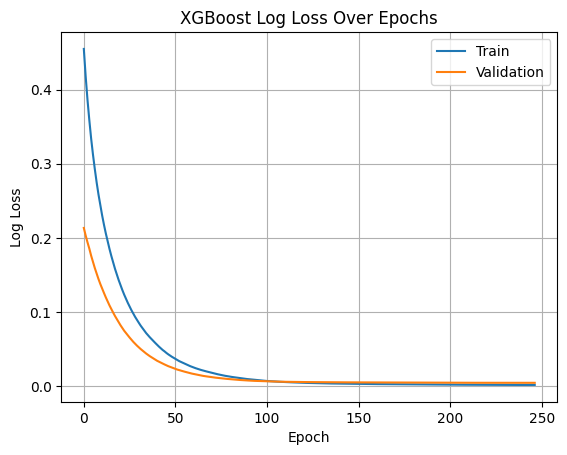

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.58      0.77      0.66        99

    accuracy                           1.00     76156
   macro avg       0.79      0.88      0.83     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


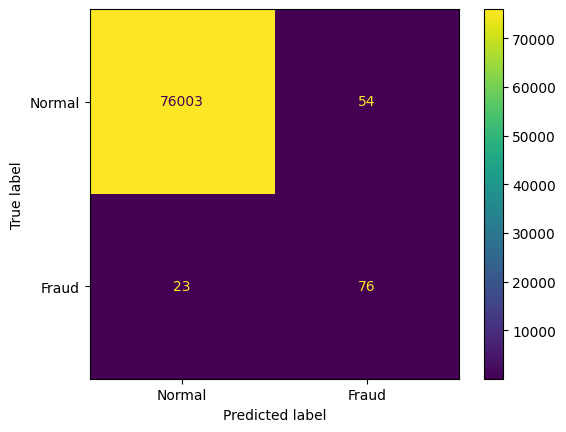

X_train_seq shape: (98428, 29)
y_train_seq shape: (98428,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:02:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


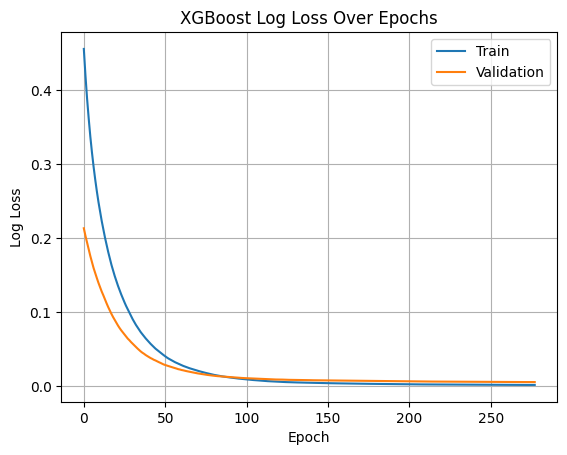

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.51      0.75      0.61        99

    accuracy                           1.00     76156
   macro avg       0.76      0.87      0.80     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


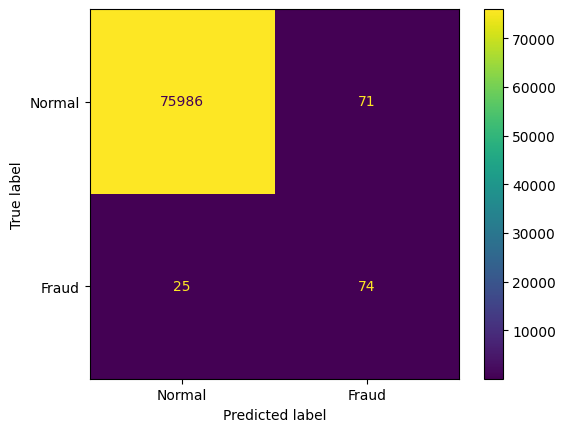

X_train_seq shape: (118128, 29)
y_train_seq shape: (118128,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:02:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


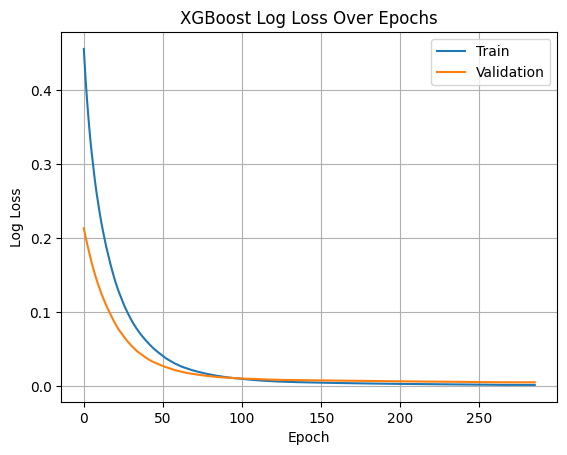

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.47      0.78      0.58        99

    accuracy                           1.00     76156
   macro avg       0.73      0.89      0.79     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


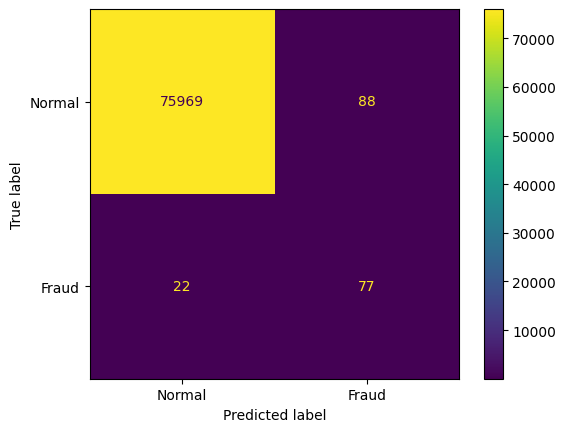

X_train_seq shape: (137835, 29)
y_train_seq shape: (137835,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:02:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


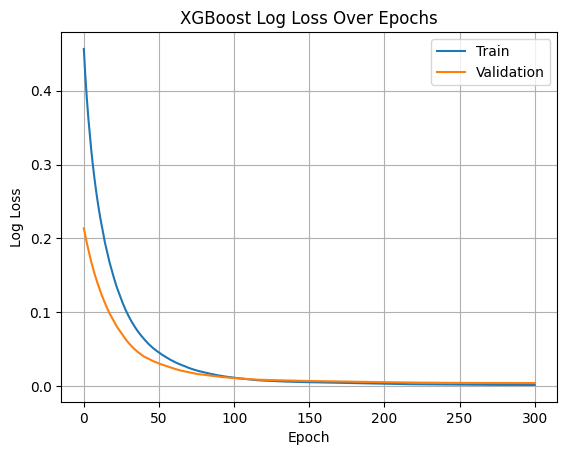

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.61      0.75      0.67        99

    accuracy                           1.00     76156
   macro avg       0.81      0.87      0.84     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


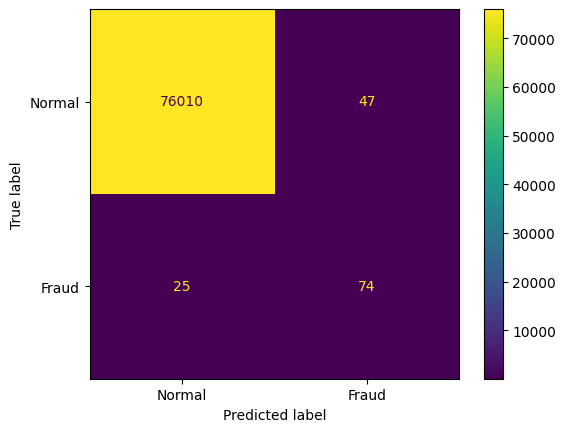

X_train_seq shape: (157542, 29)
y_train_seq shape: (157542,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:02:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


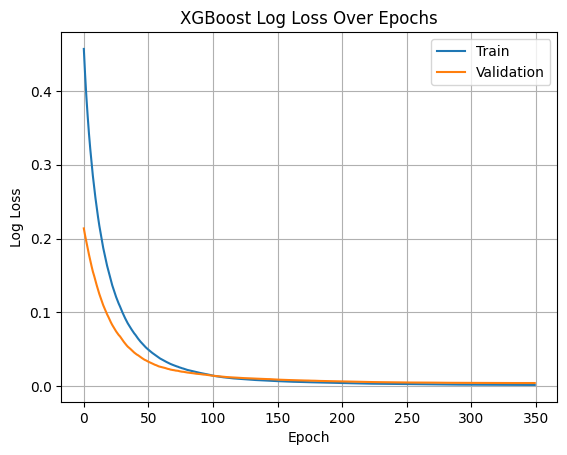

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.68      0.76      0.71        99

    accuracy                           1.00     76156
   macro avg       0.84      0.88      0.86     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


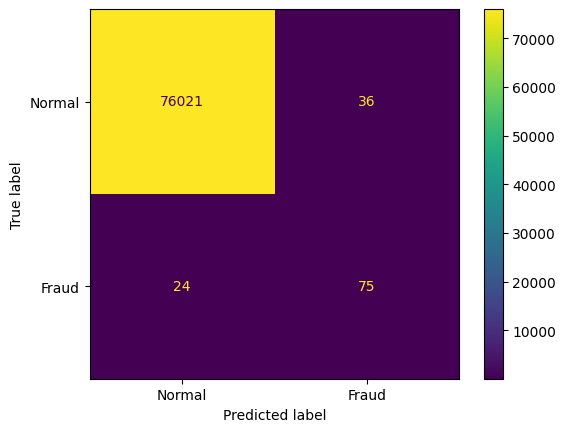

X_train_seq shape: (177265, 29)
y_train_seq shape: (177265,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:03:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


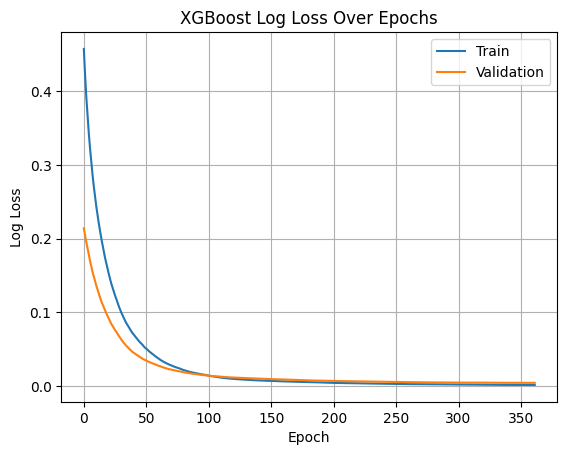

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.71      0.76      0.73        99

    accuracy                           1.00     76156
   macro avg       0.85      0.88      0.87     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


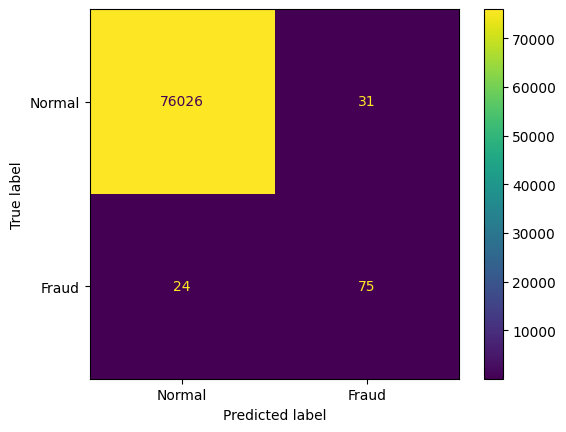

X_train_seq shape: (196893, 29)
y_train_seq shape: (196893,)
X_val_seq shape: (50783, 29)
y_val_seq shape: (50783,)


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:03:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


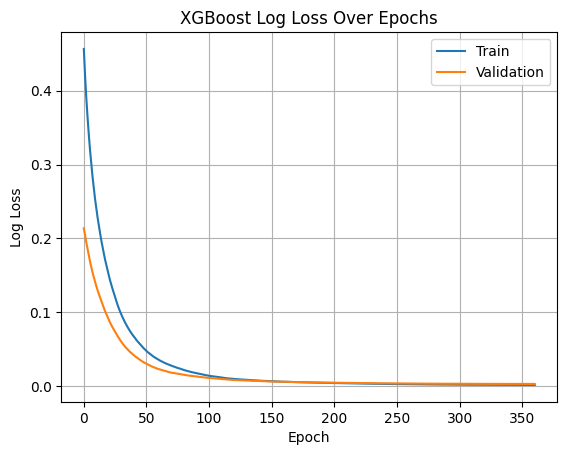

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.85      0.76      0.80        99

    accuracy                           1.00     76156
   macro avg       0.93      0.88      0.90     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


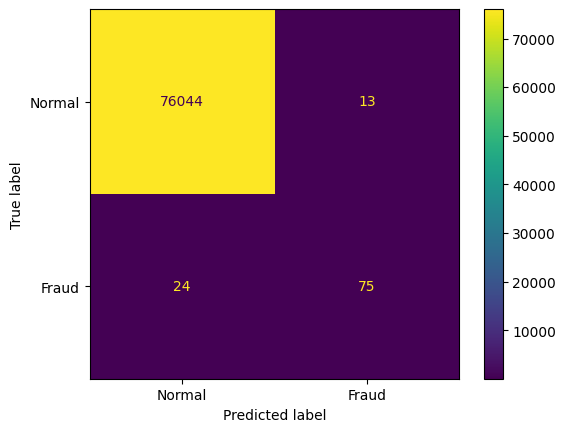

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


models = []
evals_results = []
for X_train_ds, y_train_ds in zip(X_train_datasets_smote, y_train_datasets_smote):
    print(f'X_train_seq shape: {X_train_ds.shape}')
    print(f'y_train_seq shape: {y_train_ds.shape}')
    print(f'X_val_seq shape: {X_val_proc.shape}')
    print(f'y_val_seq shape: {y_val_proc.shape}')
    model = XGBClassifier(early_stopping_rounds=15, **best_params)
    model.fit(
        X_train_ds, y_train_ds,
        eval_set = [(X_train_ds, y_train_ds), (X_val_proc, y_val_proc)],
        verbose=False
    )
    evals_result = model.evals_result()
    evals_result['train'] = evals_result['validation_0']
    del evals_result['validation_0']
    evals_result['validation'] = evals_result['validation_1']
    del evals_result['validation_1']

    models.append(model)
    evals_results.append(evals_result)

    plt.figure()
    # Plot log loss
    epochs = range(len(evals_result['train']['logloss']))
    plt.plot(epochs, evals_result['train']['logloss'], label='Train')
    plt.plot(epochs, evals_result['validation']['logloss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

     # Predict the test set
    y_pred = model.predict(X_test_proc)

    # Print a classification report
    print("Classification Report:")
    print(classification_report(y_test_proc, y_pred > 0.5))

    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test_proc, y_pred > 0.5)
    print("Confusion Matrix:")
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Fraud'])
    disp.plot()
    plt.show()


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

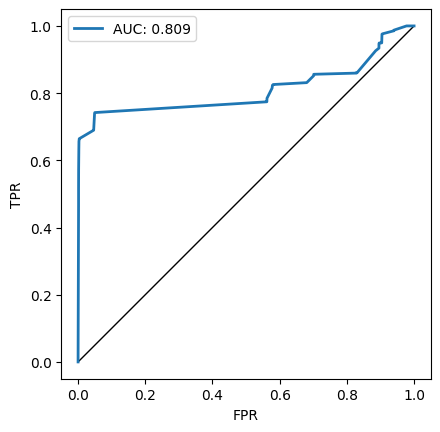

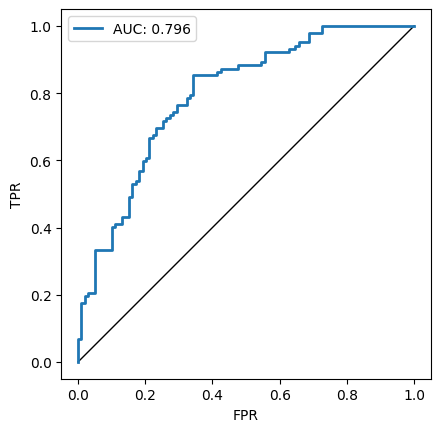

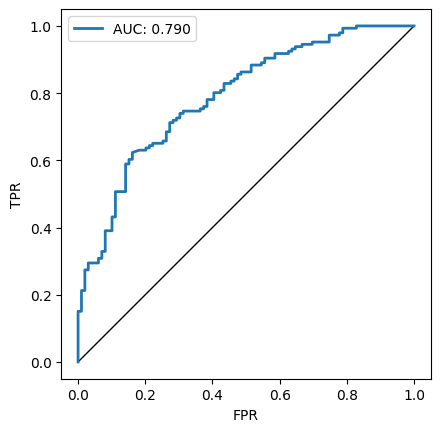

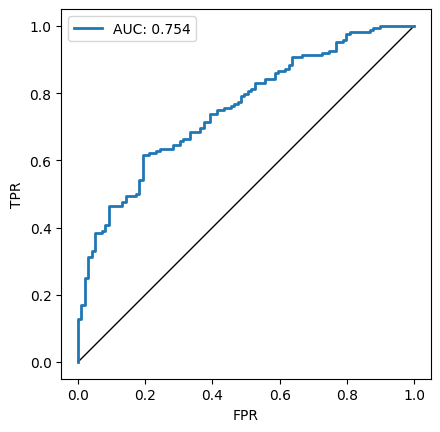

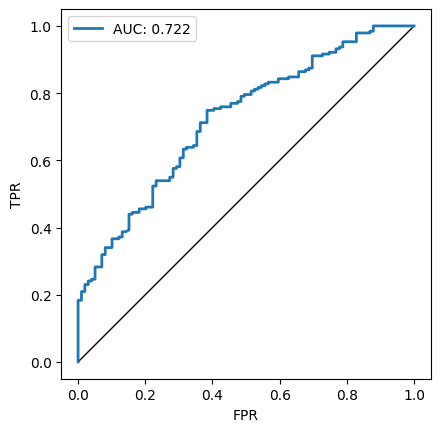

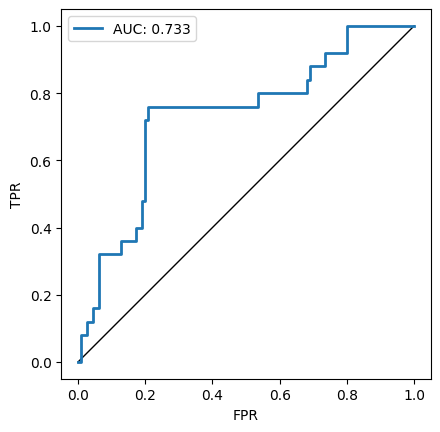

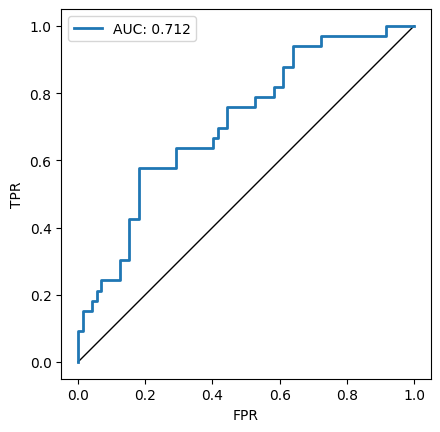

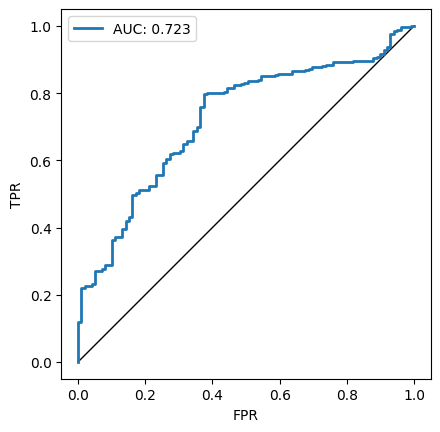

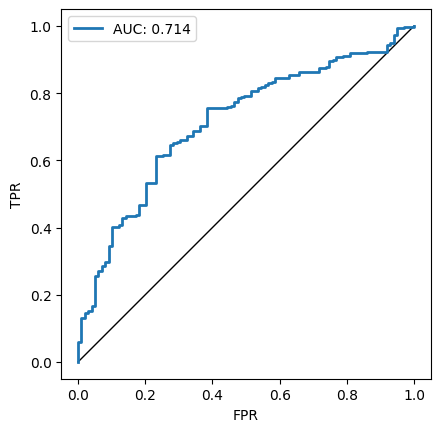

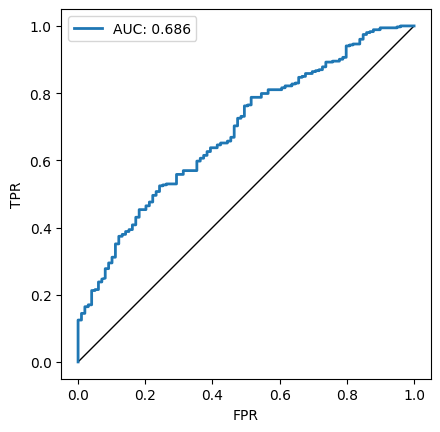

In [ ]:
from services.eval_privacy import compute_mia_attacks_with_preds


attacks_results_list = []
figure_list = []
for i, model in enumerate(models):
    attacks_result, figure = compute_mia_attacks_with_preds(model, X_train_datasets_original[i], X_test_proc, y_train_datasets_original[i], y_test_proc)    
    attacks_results_list.append(attacks_result)
    figure_list.append(figure)

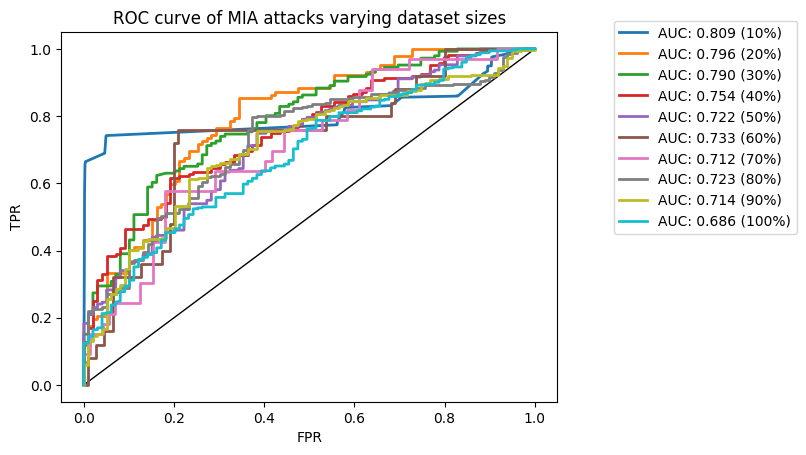

In [65]:
import matplotlib.pyplot as plt
from sklearn import metrics


fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k', lw=1.0)

auc_scores = []

for i, attacks_result in enumerate(attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    auc = metrics.auc(x, y)
    auc_scores.append(auc)
    plt.plot(x, y, lw=2, label=f'AUC: {auc:.3f} ({(i+1)*10}%)')
plt.title('ROC curve of MIA attacks varying dataset sizes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

classification_reports = []
for model in models:
    y_pred = model.predict(X_test_proc)
    cr = classification_report(y_test_proc, y_pred > 0.5, output_dict=True)
    classification_reports.append(cr)

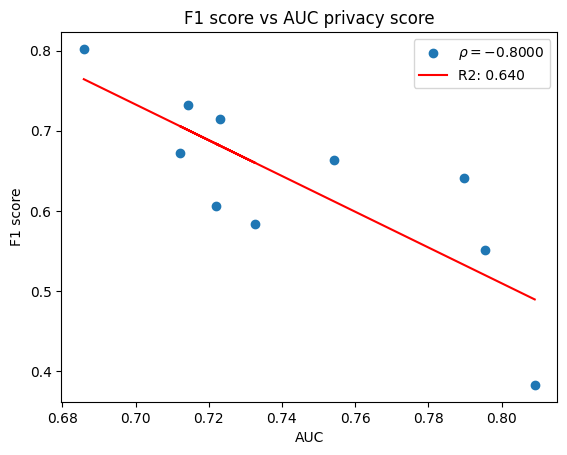

In [70]:
from sklearn.linear_model import LinearRegression
import numpy as np

aucs = []
f1_scores = []
recalls = []
precisions = []
for cr, attacks_result in zip(classification_reports, attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    auc = metrics.auc(x, y)
    f1_score = cr['1.0']['f1-score']
    recall = cr['1.0']['recall']
    precision = cr['1.0']['precision']

    aucs.append(auc)
    f1_scores.append(f1_score)
    recalls.append(recall)
    precisions.append(precision)

aucs = np.array(aucs).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(aucs, f1_scores)

rho = np.corrcoef(aucs.flatten(), f1_scores)[0, 1]
r2 = linear_model.score(aucs, f1_scores)

fig = plt.figure()
plt.title('F1 score vs AUC privacy score')
plt.scatter(aucs, f1_scores)
plt.plot(aucs, linear_model.predict(aucs), color='red')
plt.legend([fr'$\rho = {rho:.4f}$', f'R2: {r2:.3f}'])
plt.xlabel('AUC')
plt.ylabel('F1 score')
plt.show()

In [ ]:
# Save the models

import pickle

for i, model in enumerate(models):
    with open(f'model/xgboost_varying_dataset_sizes/model_{(i+1)*10}.pkl', 'wb') as f:
        pickle.dump(model, f)

In [ ]:
# Save attacks results

import pickle

res = {}
for i, ar in enumerate(attacks_results_list):
    ar_res = attacks_results_list[i].get_result_with_max_auc()
    res[i] = ar_res

with open('model/xgboost_varying_dataset_sizes/attacks_results.pkl', 'wb') as f:
    pickle.dump(res, f)

In [ ]:
# Loading the xgboost model from pickle
import pickle

for i in range(10):
    with open(f'model/xgboost_varying_dataset_sizes/model_{(i+1)*10}.pkl', 'rb') as f:
        loaded_model = pickle.load(f)

In [31]:
import pickle

baseline_attack_results = pickle.load(open('model/xgboost_varying_dataset_sizes/attacks_results.pkl', 'rb'))

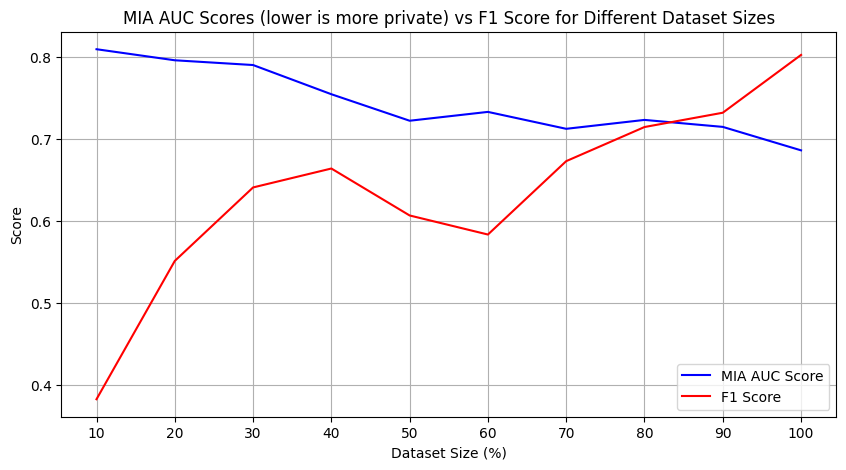

In [85]:
import matplotlib.pyplot as plt

# Plot the results for varying sequence lengths
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

dataset_sizes = [i*10 for i in range(1, 11)]

ax.plot(aucs, label='MIA AUC Score', color='blue')
ax.plot(f1_scores, label='F1 Score', color='red')
ax.set_xlabel('Dataset Size (%)')
ax.set_ylabel('Score')
ax.set_xticks(range(10), dataset_sizes) 
ax.set_title('MIA AUC Scores (lower is more private) vs F1 Score for Different Dataset Sizes')
ax.legend()
ax.grid(True)
plt.show()


In [86]:
for i in range(len(aucs)):
    print(f"Dataset size: {(i+1)*10}%", end=' ')
    print(f"MIA Score: {aucs[i]}", end=' ')
    print(f"F1 Score: {f1_scores[i]}", end=' ')
    print(f"Precision: {precisions[i]}", end=' ')
    print(f"Recall: {recalls[i]}")

Dataset size: 10% MIA Score: [0.80907307] F1 Score: 0.38271604938271603 Precision: 0.27555555555555555 Recall: 0.6262626262626263
Dataset size: 20% MIA Score: [0.79560309] F1 Score: 0.5511811023622047 Precision: 0.45161290322580644 Recall: 0.7070707070707071
Dataset size: 30% MIA Score: [0.78981597] F1 Score: 0.6406926406926406 Precision: 0.5606060606060606 Recall: 0.7474747474747475
Dataset size: 40% MIA Score: [0.75424982] F1 Score: 0.6637554585152838 Precision: 0.5846153846153846 Recall: 0.7676767676767676
Dataset size: 50% MIA Score: [0.7219578] F1 Score: 0.6065573770491803 Precision: 0.5103448275862069 Recall: 0.7474747474747475
Dataset size: 60% MIA Score: [0.73272727] F1 Score: 0.5833333333333334 Precision: 0.4666666666666667 Recall: 0.7777777777777778
Dataset size: 70% MIA Score: [0.71212121] F1 Score: 0.6727272727272727 Precision: 0.6115702479338843 Recall: 0.7474747474747475
Dataset size: 80% MIA Score: [0.72296037] F1 Score: 0.7142857142857143 Precision: 0.6756756756756757 R

In [87]:
aucs = aucs.flatten()

from scipy.stats import pearsonr

dataset_sizes = [i * 10 for i in range(1, 11)] 

# Pearson correlation
pearson_corr, p_value = pearsonr(dataset_sizes, aucs) 


print(f"Pearson correlation: {pearson_corr:.4f} (p-value: {p_value:.4f})")

from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(dataset_sizes).reshape(-1, 1)
y = np.array(aucs)

# Fit linear regression
model = LinearRegression().fit(X, y)

# Get R² score
r2 = model.score(X, y)
print(f"R² score: {r2:.4f}")

Pearson correlation: -0.9426 (p-value: 0.0000)
R² score: 0.8885


In [ ]:
from services.dp_pate_modelling import dp_pate_xgboost_time_series
from services.XGBProbaWrapper import XGBProbaWrapper

epsilon_values = [0.1, 1, 10]
delta_values = [1e-6*10**(-2*i) for i in range(4)]

results_per_eps = {}

for eps in epsilon_values:
    for delta in delta_values:
        print(f"Training with delta={delta:.1e} and epsilon={eps}")
        if eps not in results_per_eps:
            results_per_eps[eps] = {}
        dp_model, dp_train_results, X_public, y_public_true = dp_pate_xgboost_time_series(
            X_train_smote, y_train_smote,
            X_val_proc, y_val_proc,
            epsilon=eps, delta=delta,
            num_teachers=10,
            public_fraction=0.2,
            teacher_params=best_params,
            student_params=best_params
        )
        model = XGBProbaWrapper(dp_model)
        results_per_eps[eps][f"{delta:.1e}"] = {
            'model': model,
            'eval_results': dp_train_results,
            'X_public': X_public,
            'y_public_true': y_public_true
        }

Training with delta=1.0e-06 and epsilon=0.1


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:58:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:58:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:03:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-08 and epsilon=0.1


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:03:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:07:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:07:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training with delta=1.0e-10 and epsilon=0.1


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:11:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:11:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training with delta=1.0e-12 and epsilon=0.1


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:15:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training with delta=1.0e-06 and epsilon=1


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:19:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-08 and epsilon=1


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:23:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-10 and epsilon=1


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:27:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-12 and epsilon=1


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:31:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-06 and epsilon=5


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:31:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:35:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-08 and epsilon=5


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:39:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-10 and epsilon=5


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:39:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:40:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:44:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-12 and epsilon=5


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:44:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:48:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-06 and epsilon=10


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:48:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:48:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:52:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-08 and epsilon=10


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:56:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-10 and epsilon=10


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:56:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Training with delta=1.0e-12 and epsilon=10


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:04:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "use_smote" } are not used.

  self.starting_round = model.num_boosted_rounds()


Epsilon = 0.1, Delta = 1.0e-06


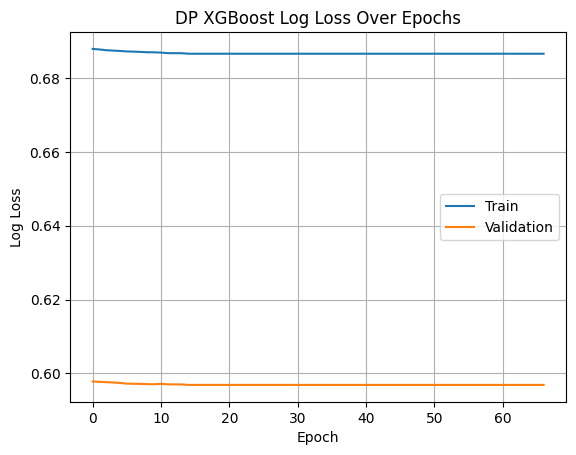

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.17      0.41      0.24        99

    accuracy                           1.00     76156
   macro avg       0.59      0.71      0.62     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 0.1, Delta = 1.0e-08


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


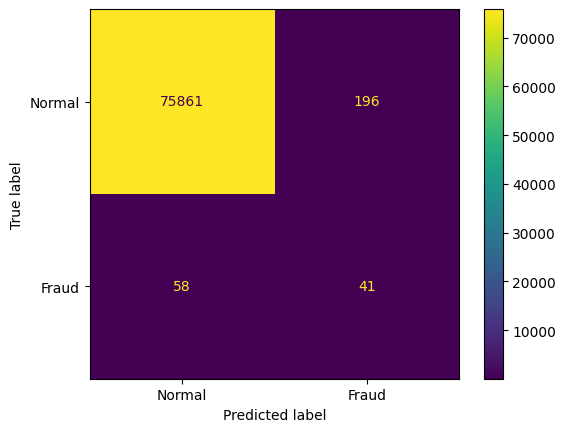

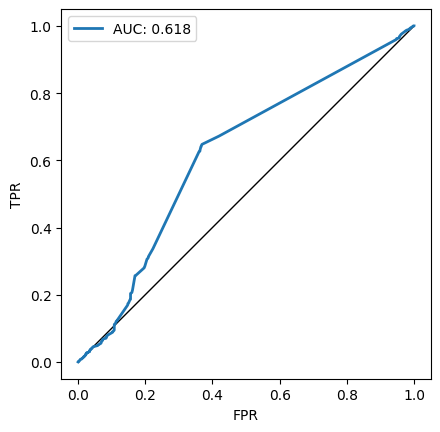

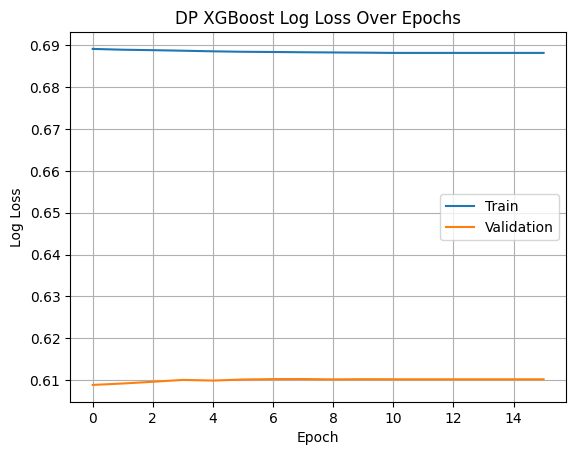

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.00      0.00      0.00        99

    accuracy                           1.00     76156
   macro avg       0.50      0.50      0.50     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Epsilon = 0.1, Delta = 1.0e-10


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


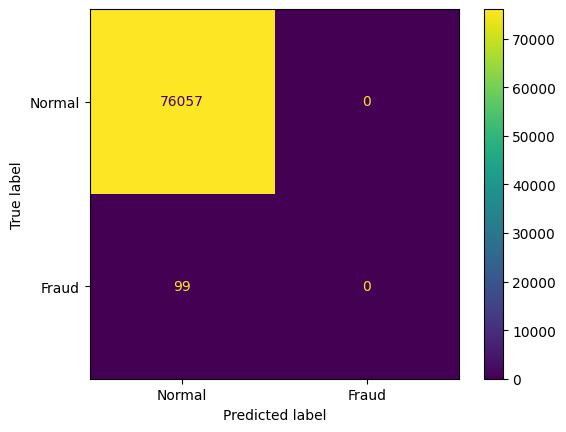

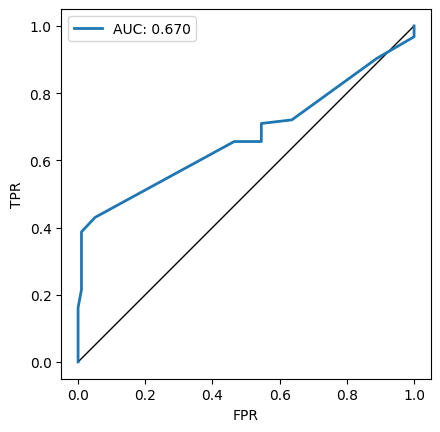

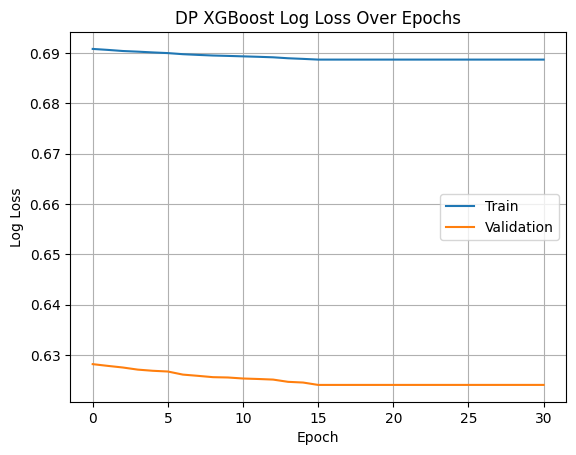

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     76057
         1.0       0.00      0.01      0.00        99

    accuracy                           0.99     76156
   macro avg       0.50      0.50      0.50     76156
weighted avg       1.00      0.99      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 0.1, Delta = 1.0e-12


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


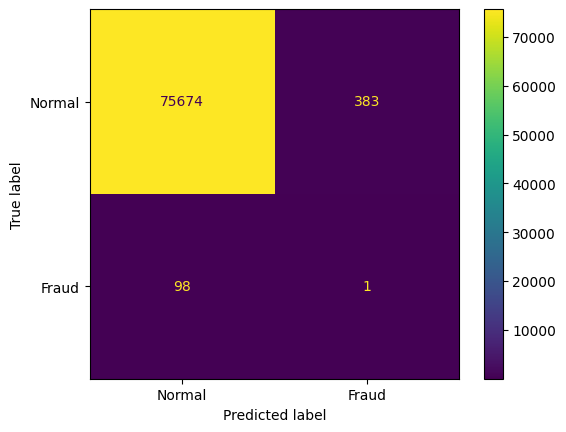

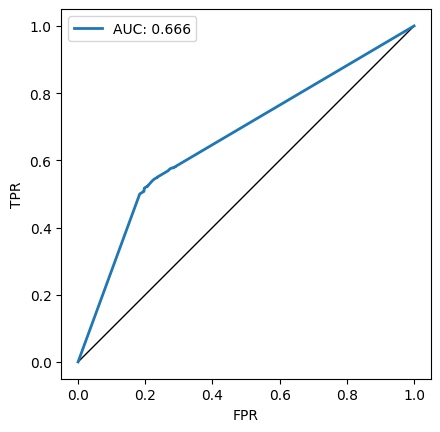

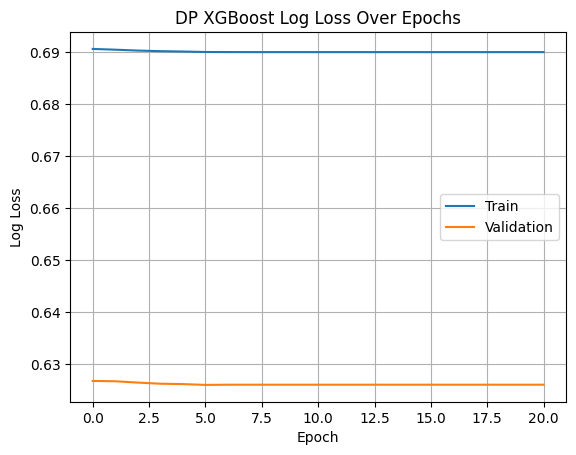

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.00      0.00      0.00        99

    accuracy                           1.00     76156
   macro avg       0.50      0.50      0.50     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 1, Delta = 1.0e-06


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


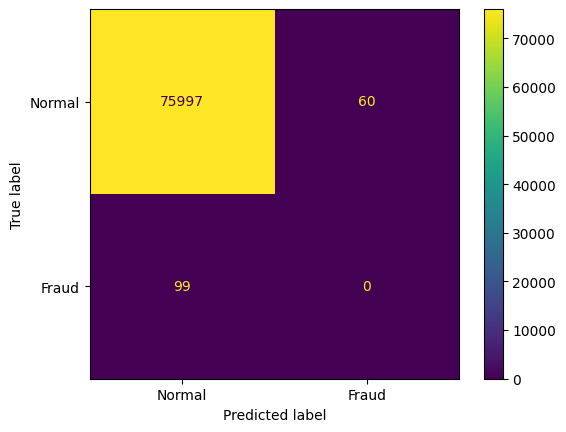

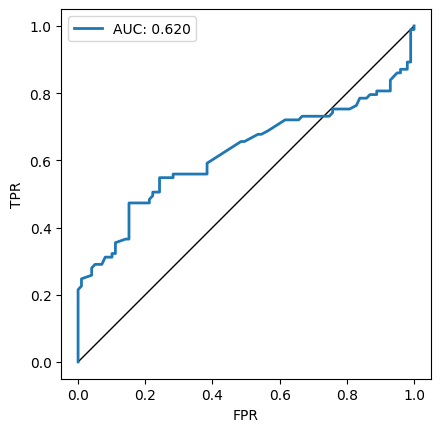

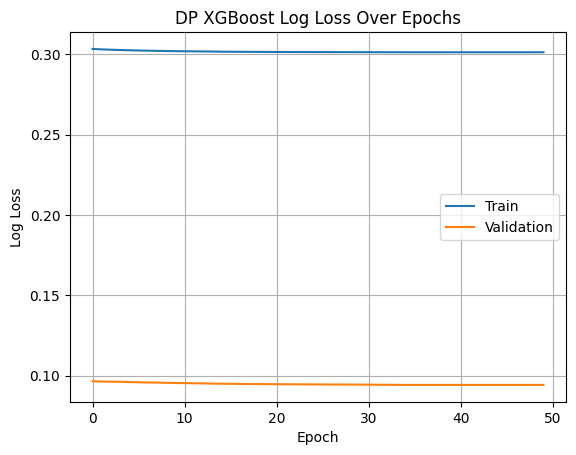

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.91      0.10      0.18        99

    accuracy                           1.00     76156
   macro avg       0.95      0.55      0.59     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 1, Delta = 1.0e-08


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


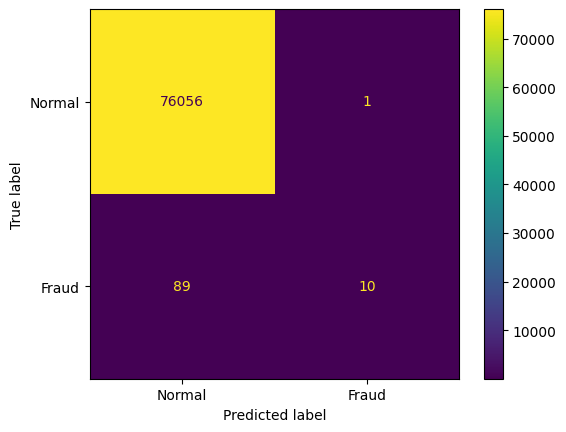

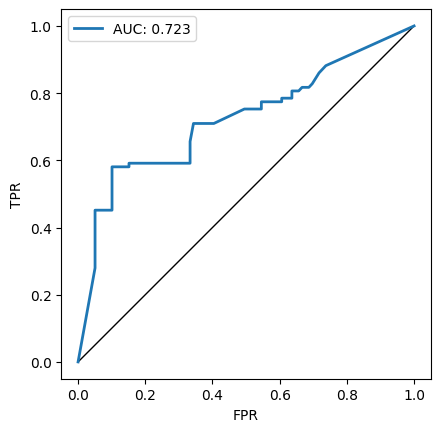

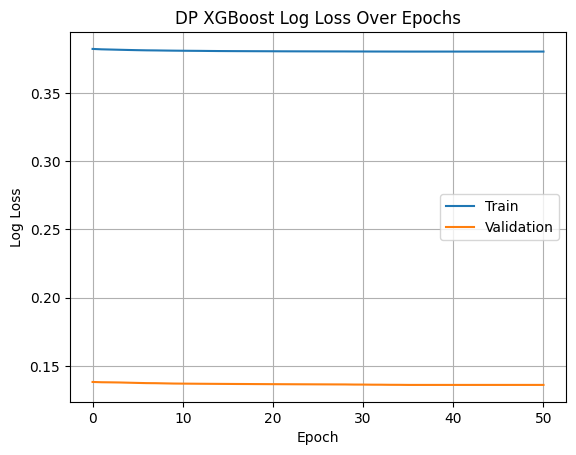

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.93      0.13      0.23        99

    accuracy                           1.00     76156
   macro avg       0.96      0.57      0.61     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 1, Delta = 1.0e-10


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


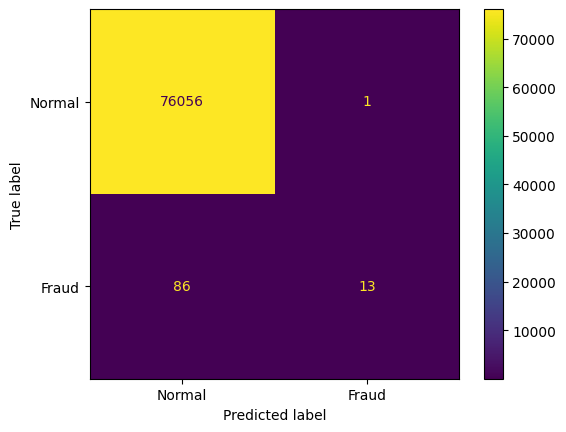

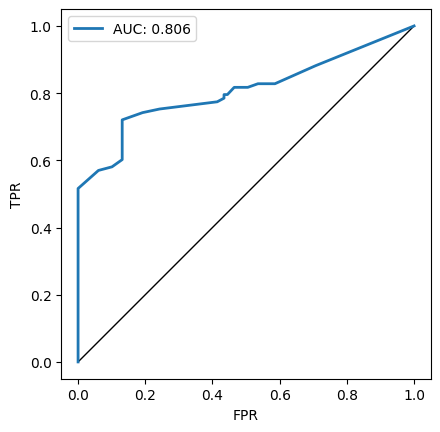

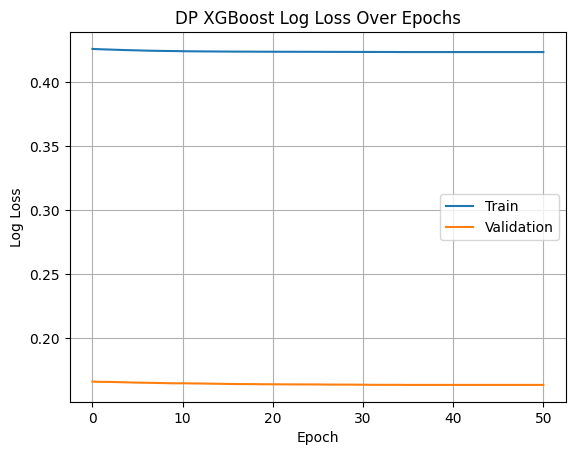

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.86      0.25      0.39        99

    accuracy                           1.00     76156
   macro avg       0.93      0.63      0.70     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 1, Delta = 1.0e-12


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


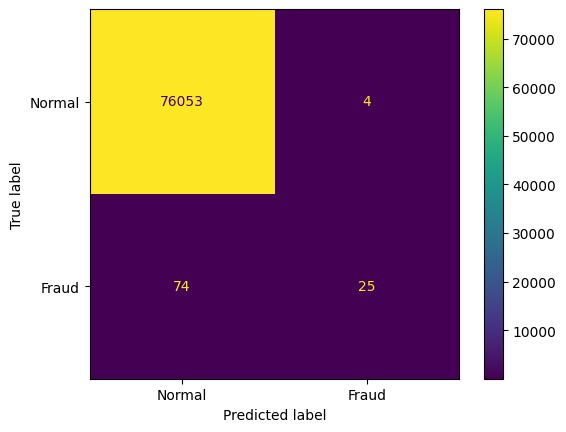

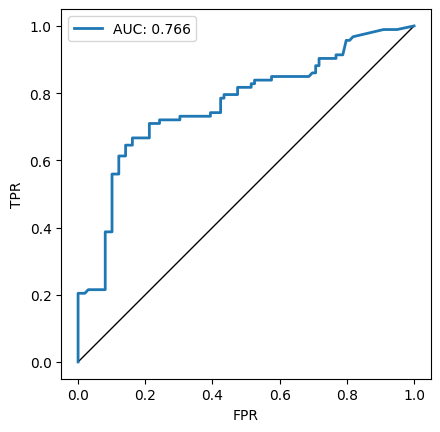

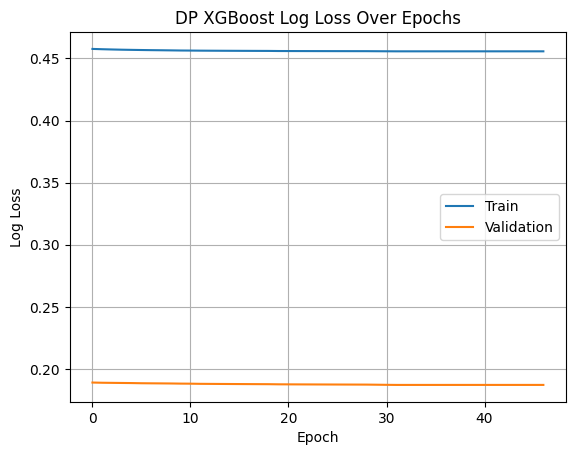

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.95      0.18      0.31        99

    accuracy                           1.00     76156
   macro avg       0.97      0.59      0.65     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-06


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


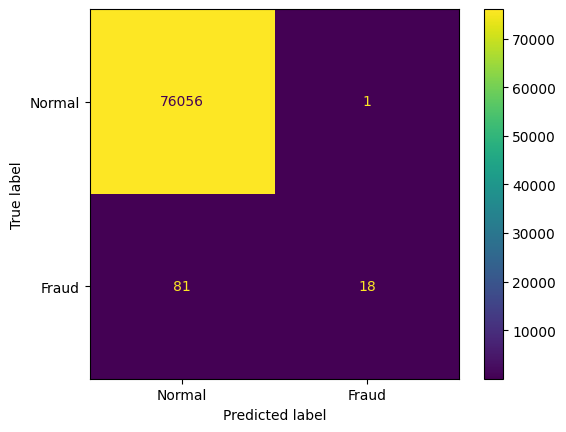

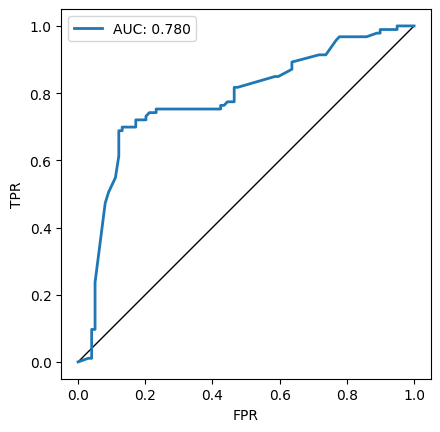

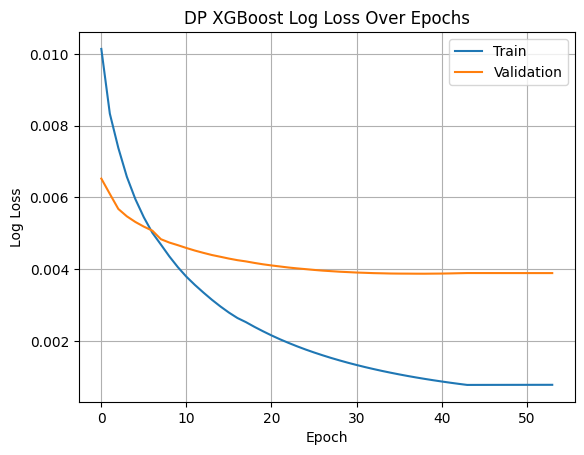

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.85      0.47      0.61        99

    accuracy                           1.00     76156
   macro avg       0.93      0.74      0.80     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-08


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


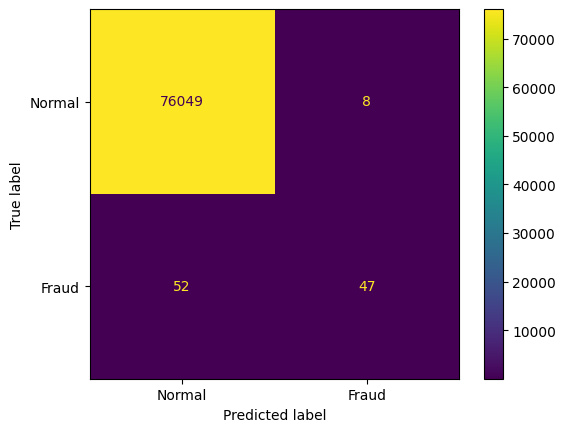

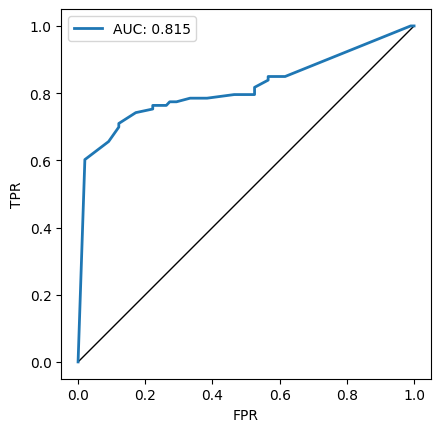

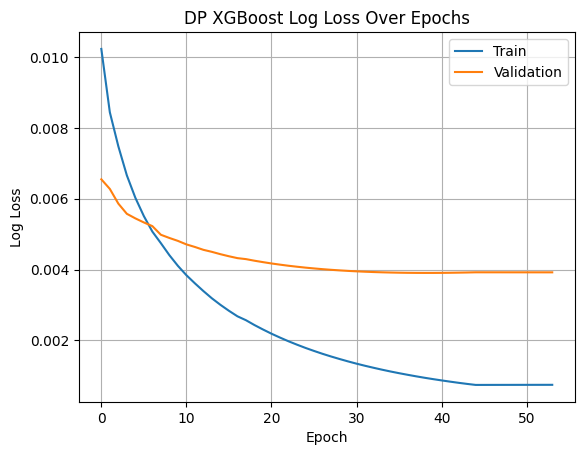

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.97      0.28      0.44        99

    accuracy                           1.00     76156
   macro avg       0.98      0.64      0.72     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-10


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


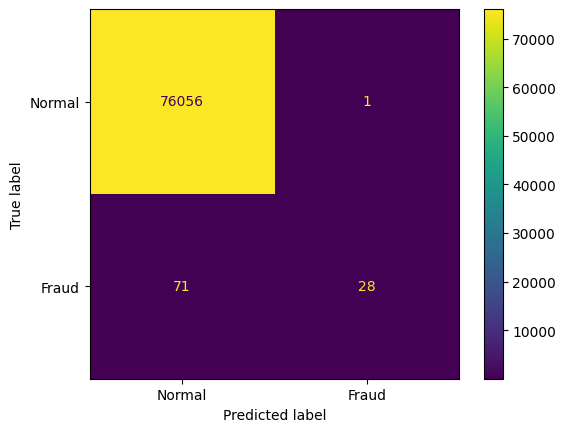

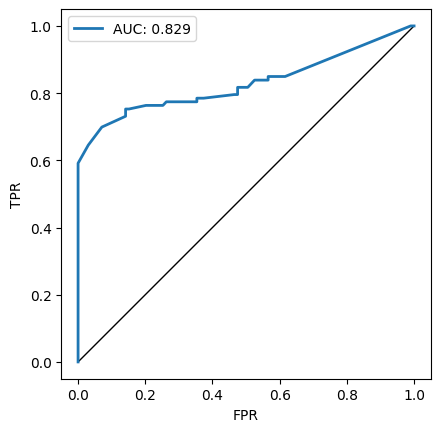

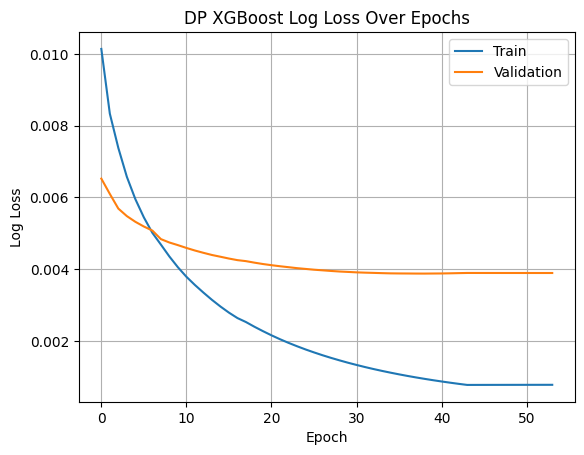

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.85      0.47      0.61        99

    accuracy                           1.00     76156
   macro avg       0.93      0.74      0.80     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-12


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


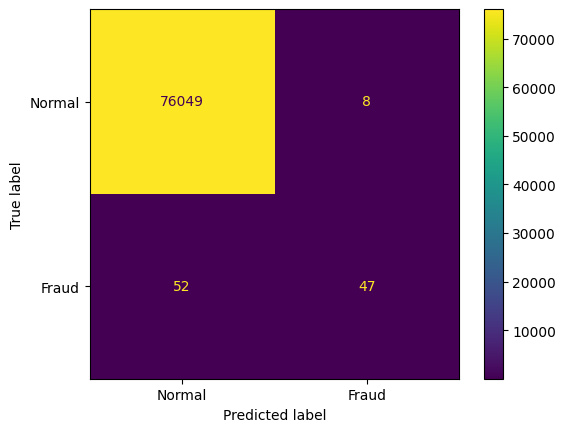

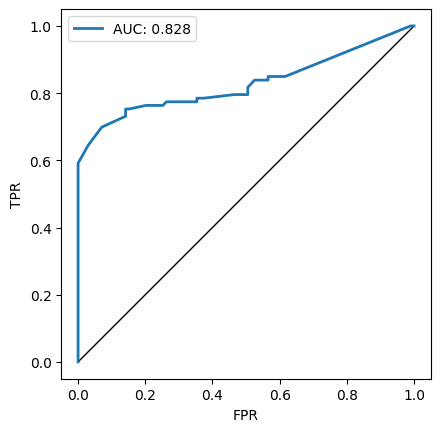

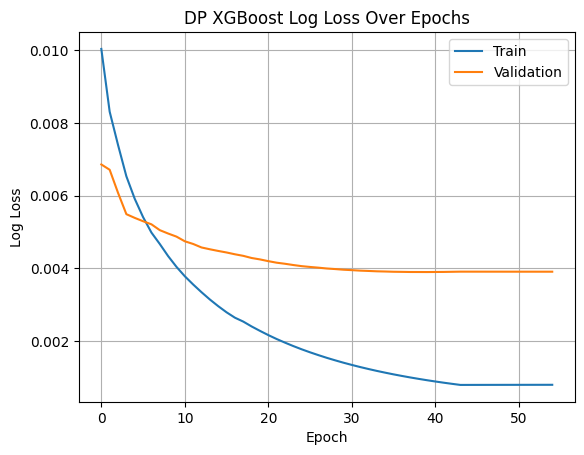

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76057
         1.0       0.97      0.28      0.44        99

    accuracy                           1.00     76156
   macro avg       0.98      0.64      0.72     76156
weighted avg       1.00      1.00      1.00     76156

Confusion Matrix:


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

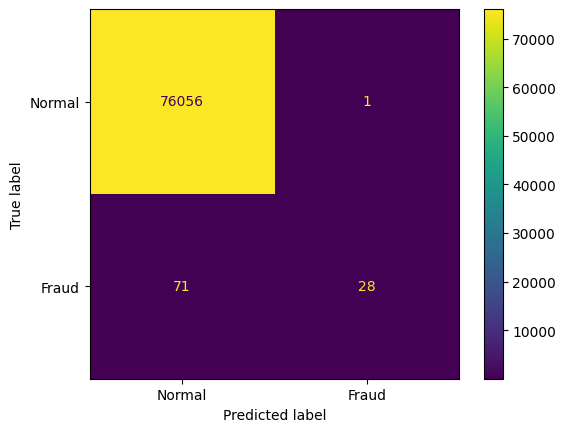

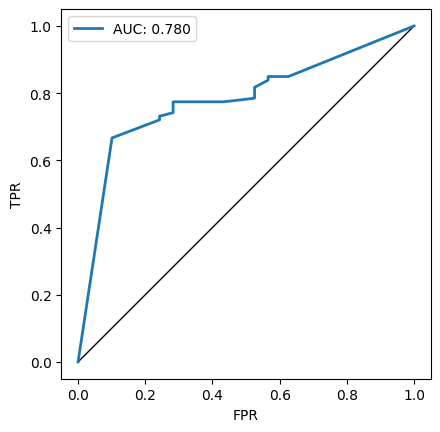

In [ ]:
from services.eval_privacy import compute_mia_attacks_with_preds
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

attacks_results_dict = {}
for eps, delta_results in results_per_eps.items():
    for delta, result in delta_results.items():
        model = result['model']
        eval_result = result['eval_results']
        X_public, y_public_true = result['X_public'], result['y_public_true']

        print(f"Epsilon = {eps}, Delta = {delta}")

        plt.figure()
        # Plot log loss
        epochs = range(len(eval_result['train']['logloss']))
        plt.plot(epochs, eval_result['train']['logloss'], label='Train')
        plt.plot(epochs, eval_result['validation']['logloss'], label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Log Loss')
        plt.title('DP XGBoost Log Loss Over Epochs')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Predict the test set
        y_pred = model.predict(X_test_proc)

        # Print a classification report
        print("Classification Report:")
        print(classification_report(y_test_proc, y_pred > 0.5))

        # Create a confusion matrix
        conf_matrix = confusion_matrix(y_test_proc, y_pred > 0.5)
        print("Confusion Matrix:")
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Fraud'])
        disp.plot()

        n_rows = len(X_public)
        attacks_result, figure = compute_mia_attacks_with_preds(model, X_public, X_test_proc, y_public_true, y_test_proc)
        if eps not in attacks_results_dict:
            attacks_results_dict[eps] = {}
        attacks_results_dict[eps][delta] = attacks_result

Epsilon = 10, Delta = 1.0e-06


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-08


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-10


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-12


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

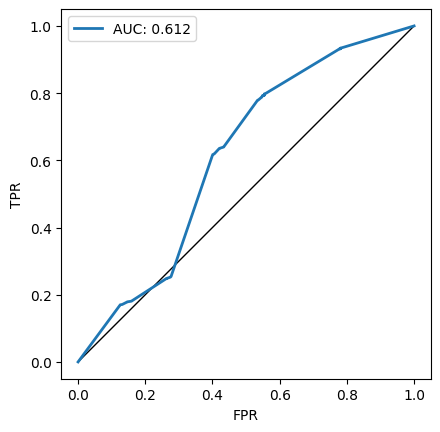

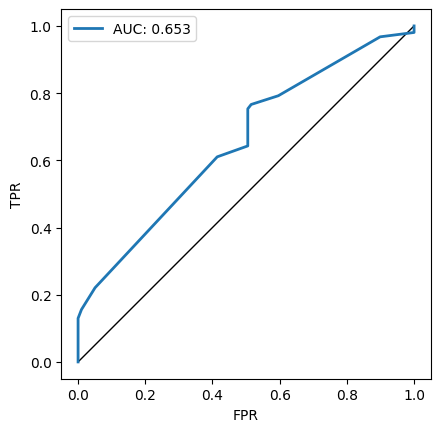

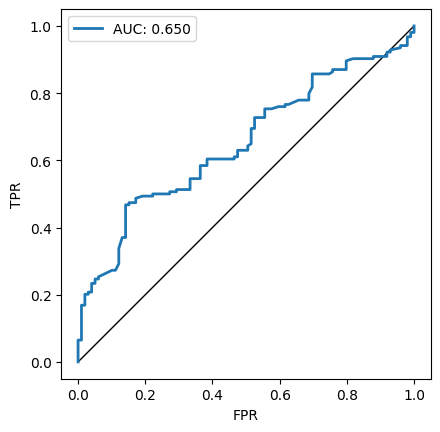

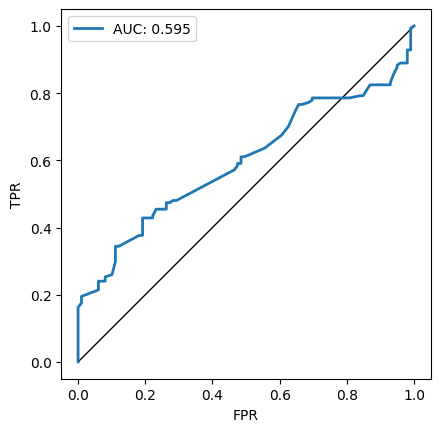

In [ ]:
from services.eval_privacy import compute_mia_attacks_with_preds

for delta, result in results_per_eps[0.1].items():
    model = result['model']
    X_public, y_public_true = result['X_public'], result['y_public_true']
    print(f"Epsilon = {eps}, Delta = {delta}")

    n_rows = len(X_test_proc)
    attacks_result, figure = compute_mia_attacks_with_preds(model, X_train_base[-n_rows:], X_test_proc, y_train_base[-n_rows:], y_test_proc)
    attacks_results_dict[eps][delta] = attacks_result

Epsilon = 10, Delta = 1.0e-06


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-08


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-10


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-12


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

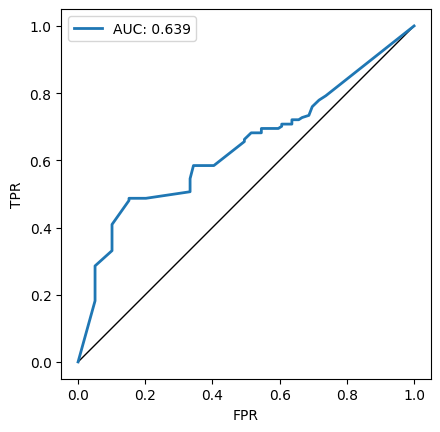

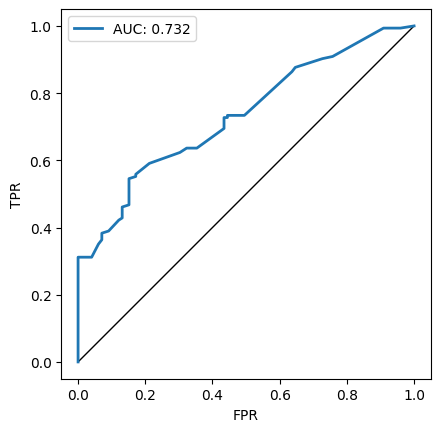

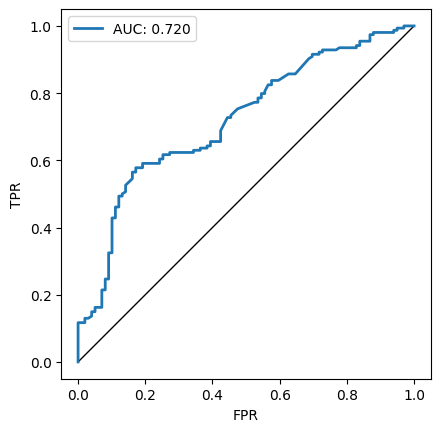

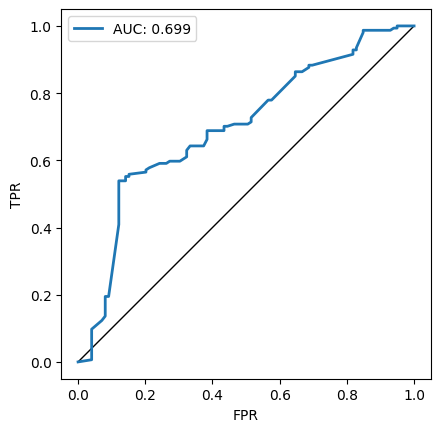

In [ ]:
from services.eval_privacy import compute_mia_attacks_with_preds

for delta, result in results_per_eps[1].items():
    model = result['model']
    X_public, y_public_true = result['X_public'], result['y_public_true']
    print(f"Epsilon = {eps}, Delta = {delta}")

    n_rows = len(X_test_proc)
    attacks_result, figure = compute_mia_attacks_with_preds(model, X_train_base[-n_rows:], X_test_proc, y_train_base[-n_rows:], y_test_proc)
    attacks_results_dict[eps][delta] = attacks_result

Epsilon = 10, Delta = 1.0e-06


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-08


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-10


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

Epsilon = 10, Delta = 1.0e-12


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

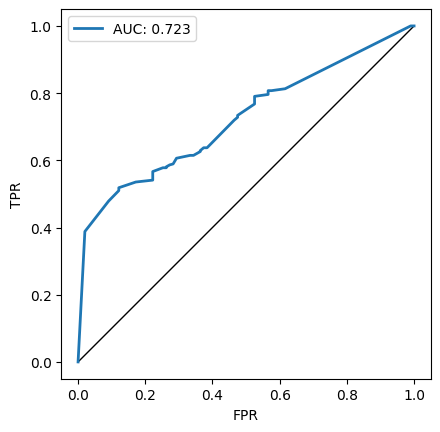

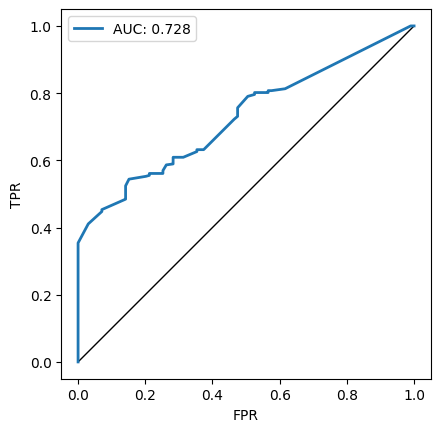

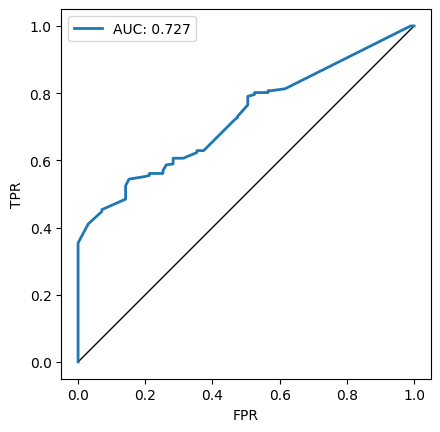

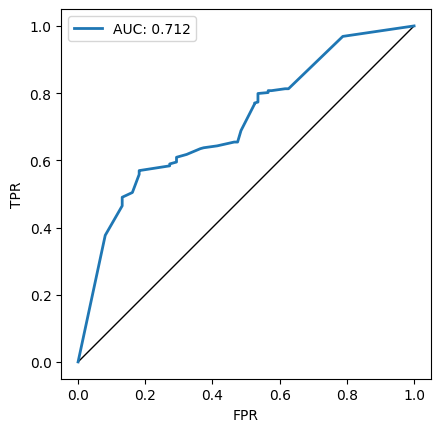

In [ ]:
from services.eval_privacy import compute_mia_attacks_with_preds

for delta, result in results_per_eps[10].items():
    model = result['model']
    X_public, y_public_true = result['X_public'], result['y_public_true']
    print(f"Epsilon = {eps}, Delta = {delta}")
    
    n_rows = len(X_test_proc)
    attacks_result, figure = compute_mia_attacks_with_preds(model, X_train_base[-n_rows:], X_test_proc, y_train_base[-n_rows:], y_test_proc)
    attacks_results_dict[eps][delta] = attacks_result

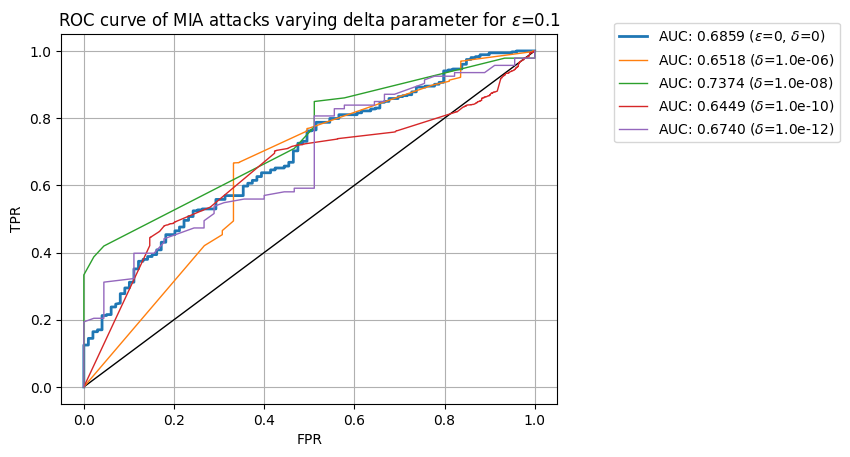

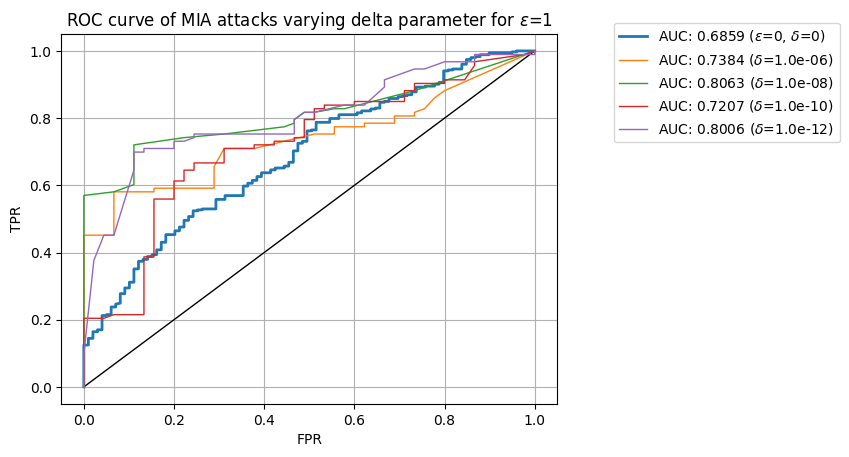

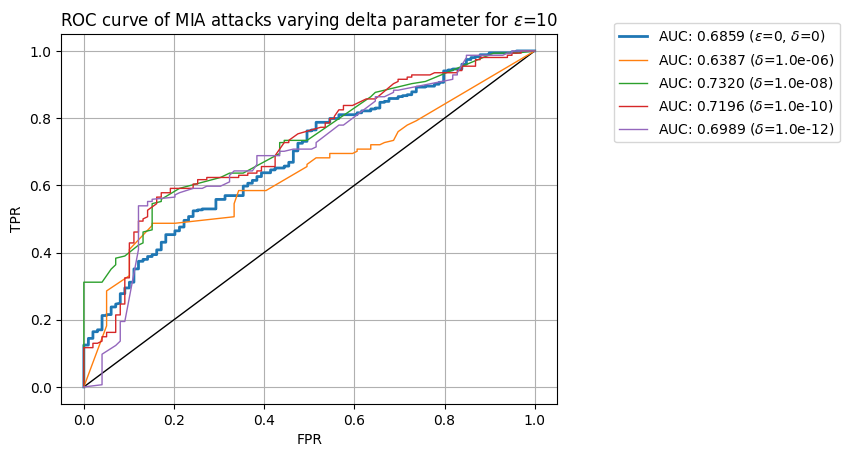

In [78]:
from sklearn import metrics

for eps in attacks_results_dict: 
    fig = plt.figure()
    plt.plot([0, 1], [0, 1], 'k', lw=1.0)
    x_baseline = baseline_attack_results[9].roc_curve.fpr
    y_baseline = baseline_attack_results[9].roc_curve.tpr
    auc_baseline = metrics.auc(x_baseline, y_baseline)
    plt.plot(x_baseline, y_baseline, lw=2, label=f'AUC: {auc_baseline:.4f} ($\epsilon$=0, $\delta$=0)')
    for delta in attacks_results_dict[eps]:
        x = attacks_results_dict[eps][delta].get_result_with_max_auc().roc_curve.fpr
        y = attacks_results_dict[eps][delta].get_result_with_max_auc().roc_curve.tpr
        auc = metrics.auc(x, y)
        plt.plot(x, y, lw=1, label=f'AUC: {auc:.4f} ($\delta$={delta})')
    plt.title(f'ROC curve of MIA attacks varying delta parameter for $\epsilon$={eps}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

In [108]:
epsilon_values = [0.1, 1, 10]
delta_values = [1e-6, 1e-8, 1e-10, 1e-12]

X_train_dp = {}
y_train_dp = {}

for eps in epsilon_values:
    for delta in delta_values:
        if eps not in X_train_dp:
            X_train_dp[eps] = {}
            y_train_dp[eps] = {}
        X_train_dp[eps][delta] = np.loadtxt(f'data/dp/{float(eps)}/{float(delta)}/X_synth.txt')
        y_train_dp[eps][delta] = np.loadtxt(f'data/dp/{float(eps)}/{float(delta)}/y_synth.txt')

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

results_train_dp = {}

for eps in X_train_dp:
    for delta in X_train_dp[eps]:
        train_X = X_train_dp[eps][delta]
        train_y = y_train_dp[eps][delta]

        Xt_b, yt_b, scaler = prepare_flattened_data(train_X, train_y, apply_smote=False, fit_scaler=True)
        Xt_smote, yt_smote, _ = prepare_flattened_data(train_X, train_y, apply_smote=True, scaler=scaler)
        Xv_proc, yv_proc, _ = prepare_flattened_data(X_val, y_val, apply_smote=False, scaler=scaler)
        Xte_proc, yte_proc, _ = prepare_flattened_data(X_test, y_test, apply_smote=False, scaler=scaler)

        train_X = Xt_smote if best_params['use_smote'] else Xt_b
        train_y = yt_smote if best_params['use_smote'] else yt_b


        model = XGBClassifier(early_stopping_rounds=15, **best_params)
        model.fit(
            train_X, train_y,
            eval_set=[(Xv_proc, yv_proc)],
            verbose=False
        )

        if eps not in results_train_dp:
            results_train_dp[eps] = {}
        if delta not in results_train_dp[eps]:
            results_train_dp[eps][delta] = {}

        evals_result = model.evals_result()
        evals_result['train'] = evals_result['validation_0']
        del evals_result['validation_0']
        evals_result['validation'] = evals_result['validation_1']
        del evals_result['validation_1']

        results_train_dp[eps][delta]['model'] = model
        results_train_dp[eps][delta]['evals_result'] = model.evals_result()

        plt.figure()
        # Plot log loss
        epochs = range(len(evals_result['train']['logloss']))
        plt.plot(epochs, evals_result['train']['logloss'], label='Train')
        plt.plot(epochs, evals_result['validation']['logloss'], label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Log Loss')
        plt.title(f'XGBoost Log Loss Over Epochs $\epsilon={eps}$, $\delta={delta}$')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Predict the test set
        y_pred = model.predict(Xte_proc)

        # Print a classification report
        print("Classification Report:")
        print(classification_report(yte_proc, y_pred > 0.5))

        # Create a confusion matrix
        conf_matrix = confusion_matrix(yte_proc, y_pred > 0.5)
        print("Confusion Matrix:")
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Fraud'])
        disp.plot()
        plt.show()

c:\Users\Albert Salles\anaconda3\envs\ds\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead